<a href="https://colab.research.google.com/github/nniedev/graphs-game/blob/main/Graphs_and_Social_1st_Assignment_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeiro Trabalho - Grafos e Redes Sociais

##1. Import de Bibliotecas

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

##2. Desenvolvimento do Trabalho

###2.1. Criando GridLine:

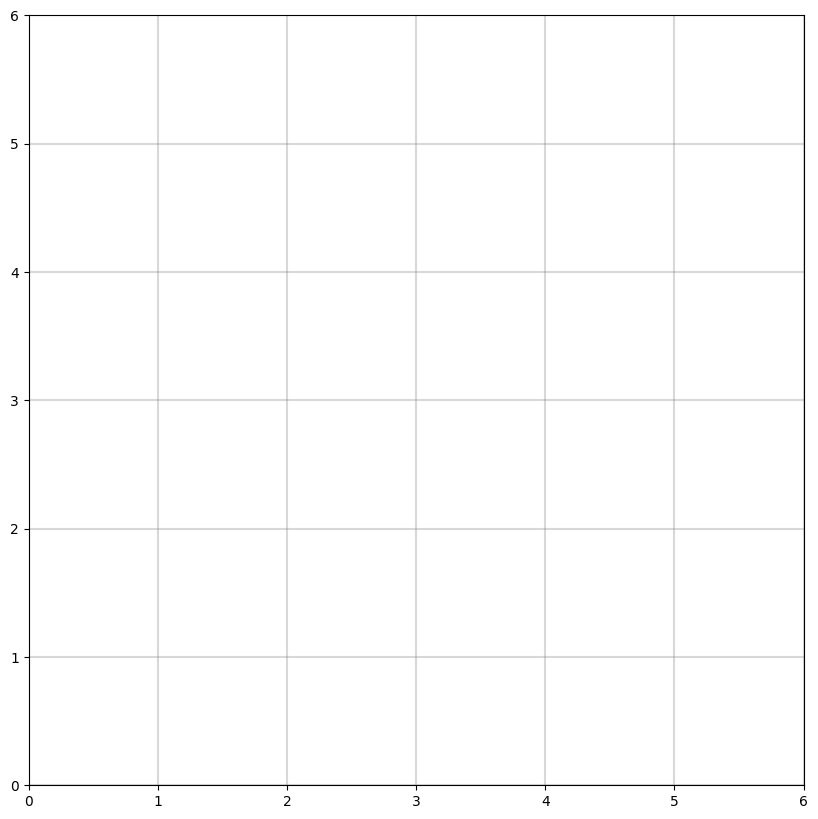

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = 6
n_cols = 6

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)

#ax.set_xticks([])
#ax.set_yticks([])

plt.show()

###2.2. Setando Matriz

In [3]:
numberToLetter = {1:'C',2:'Q',3:'T',4:'E'}
MATRIZ = [  #Assumir 1=Círculo, 2=Quadrado, 3=Triangulo
    [2,3,1,3,1,2],
    [3,3,2,1,2,3],
    [1,2,3,2,3,1],
    [3,1,2,2,3,3],
    [1,2,3,2,3,1],
    [2,3,1,1,2,3]
]


###2.3. Plotando Tabela de Acordo com Matriz

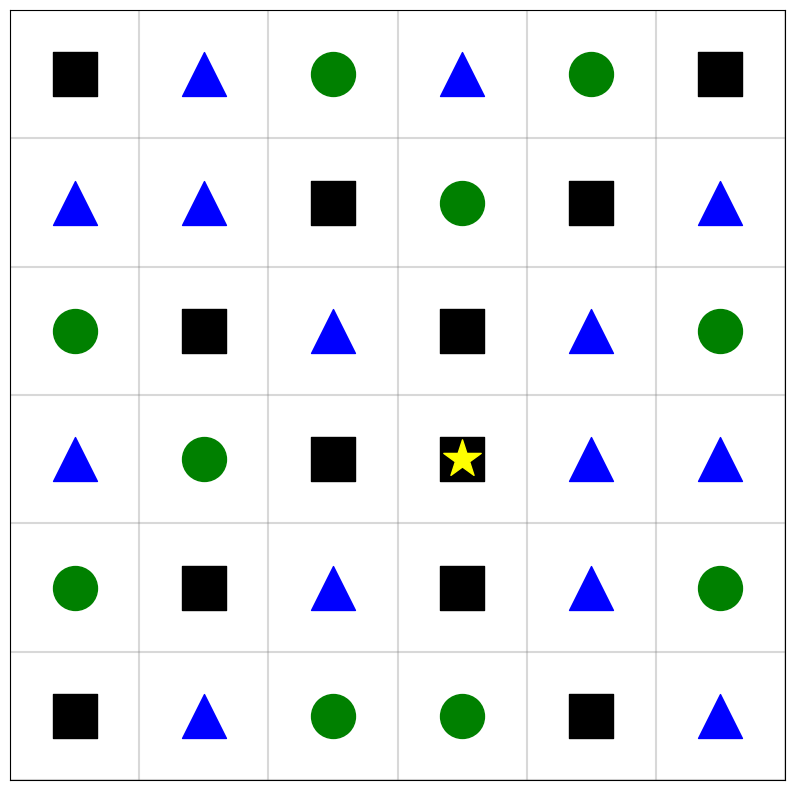

In [4]:
#Salva a pos e seta a forma
nodes = []
i = 0
posColuna = 0
for linha in MATRIZ:
  for coluna in linha:
    posLinha =  abs(i-5) # 0 = 5, 1= 4, 2=3, 3=2, 4=1, 5=0
    simbolo = MATRIZ[i][posColuna]
    simbolo = numberToLetter[simbolo]
    nodes.append((posColuna, posLinha, simbolo))
    posColuna += 1
  posColuna = 0
  i += 1

#Formata para o formato 05Q: (0,5)
pos = dict()
nodeNames = []
for i,j,s in nodes:
  node = str(i)+str(j)+str(s)
  nodeNames.append(node)
  pos[node] = (i,j)

#Criação de Grafo
GraphTest = nx.DiGraph()
GraphTest.add_nodes_from(nodeNames)

#Set das Formas
quadrados = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'Q']
circulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'C']
triangulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'T']
especial = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'E']

#Gridline
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = 6
n_cols = 6

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

#Centraliza
pos = {}
for i,j,s in nodes:
    node = str(i)+str(j)+str(s)
    pos[node] = (i + 0.5, j + 0.5)

#Plota as formas
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= quadrados,
                      node_color='black',
                      node_shape='s',
                      node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= triangulos,
                      node_color='blue',
                      node_shape='^',
                      node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= circulos,
                      node_color='green',
                      node_shape='o',
                      node_size=1000)

#Plota a Estrela por cima
plt.scatter(pos['32Q'][0], pos['32Q'][1], color='yellow', marker='*', s=800, zorder=3)

#Seta
#nx.draw_networkx_edges(Graph, pos, edge_color='black', arrows=True, arrowsize=20)

#Definições
ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
#ax.set_xticks([])
#ax.set_yticks([])
plt.show()

###2.4. Definição de Regras

Regras:

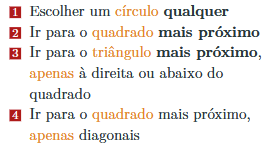

###2.5. Plotanto Setas de Acordo com Regras

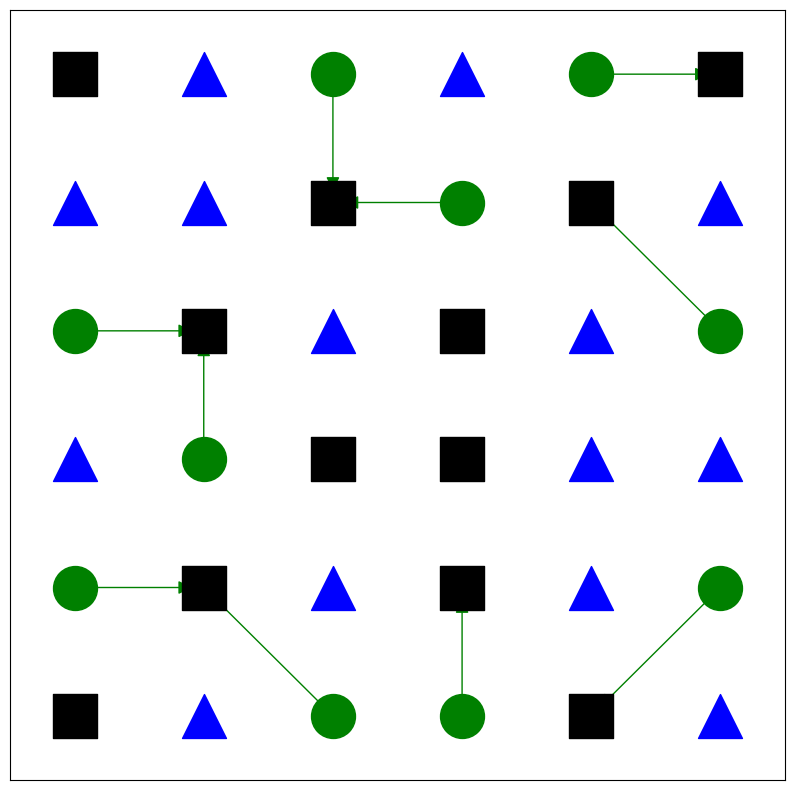

In [18]:
def distancia(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Adicionar arestas dos círculos para os quadrados mais próximos
arestas_verdes = []
for circulo in circulos:
    pos_circulo = pos[circulo]
    quadrado_mais_proximo = min(quadrados, key=lambda q: distancia(pos[q], pos_circulo))
    GraphTest.add_edge(circulo, quadrado_mais_proximo)
    arestas_verdes.append((circulo, quadrado_mais_proximo))

# Plotar o grafo
fig, ax = plt.subplots(figsize=(10, 10))

# Desenhar nós
nx.draw_networkx_nodes(GraphTest, pos, nodelist=quadrados, node_color='black', node_shape='s', node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos, nodelist=triangulos, node_color='blue', node_shape='^', node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos, nodelist=circulos, node_color='green', node_shape='o', node_size=1000)

# Desenhar arestas verdes
nx.draw_networkx_edges(GraphTest, pos, edgelist=arestas_verdes, edge_color='green', arrows=True, arrowsize=20)

# Ajustar limites do gráfico
ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()


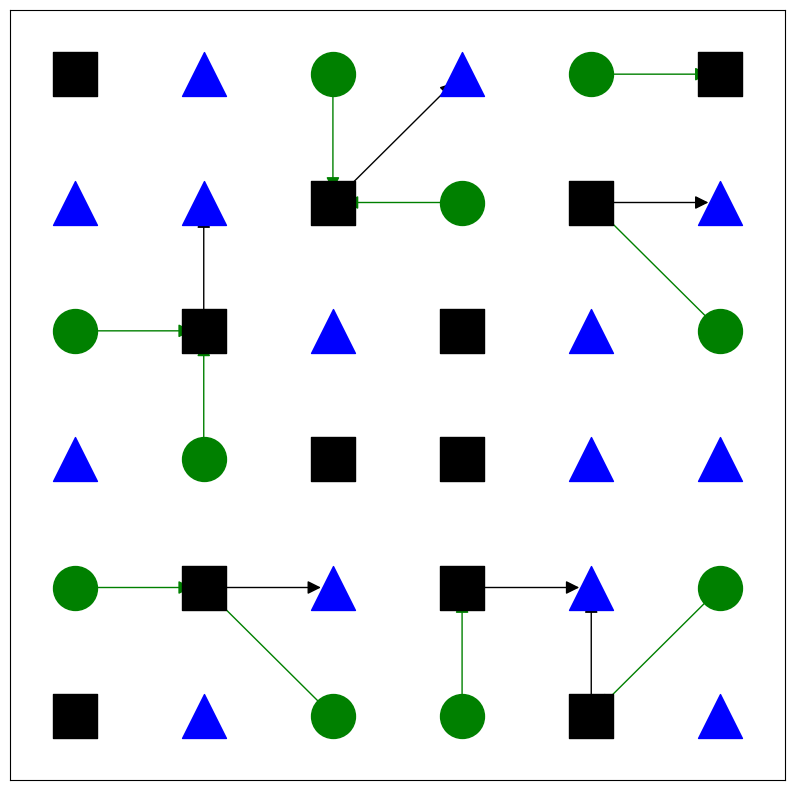

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def distancia(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Criar um grafo dirigido
GraphTest = nx.DiGraph()
GraphTest.add_nodes_from(nodeNames)

# Adicionar arestas dos círculos para os quadrados mais próximos
arestas_verdes = []
quadrados_recebendo_verde = set()
for circulo in circulos:
    pos_circulo = pos[circulo]
    quadrado_mais_proximo = min(quadrados, key=lambda q: distancia(pos[q], pos_circulo))
    GraphTest.add_edge(circulo, quadrado_mais_proximo)
    arestas_verdes.append((circulo, quadrado_mais_proximo))
    quadrados_recebendo_verde.add(quadrado_mais_proximo)

# Adicionar arestas pretas apenas dos quadrados que receberam arestas verdes para os triângulos mais próximos (somente à direita ou abaixo)
arestas_pretas = []
for quadrado in quadrados_recebendo_verde:
    pos_quadrado = pos[quadrado]
    triangulos_validos = [t for t in triangulos if pos[t][0] >= pos_quadrado[0] and pos[t][1] >= pos_quadrado[1]]
    if triangulos_validos:
        triangulo_mais_proximo = min(triangulos_validos, key=lambda t: distancia(pos[t], pos_quadrado))
        GraphTest.add_edge(quadrado, triangulo_mais_proximo)
        arestas_pretas.append((quadrado, triangulo_mais_proximo))

# Plotar o grafo
fig, ax = plt.subplots(figsize=(10, 10))

# Desenhar nós
nx.draw_networkx_nodes(GraphTest, pos, nodelist=quadrados, node_color='black', node_shape='s', node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos, nodelist=triangulos, node_color='blue', node_shape='^', node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos, nodelist=circulos, node_color='green', node_shape='o', node_size=1000)

# Desenhar arestas verdes
nx.draw_networkx_edges(GraphTest, pos, edgelist=arestas_verdes, edge_color='green', arrows=True, arrowsize=20)

# Desenhar arestas pretas
nx.draw_networkx_edges(GraphTest, pos, edgelist=arestas_pretas, edge_color='black', arrows=True, arrowsize=20)

# Ajustar limites do gráfico
ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()


###2.6. Plot Final de Caminho com Estrela